# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 


## Homework 7:  ANNs and Model interpretability 


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader and Chris Tanner<br/>


<hr style="height:2pt">



In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- **This is an individual homework. No group collaboration.**
- To submit your assignment, follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and are aiming to teach. And, if a problem specifies a particular library, you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [153]:
### cs109default ### 
import random
random.seed(112358)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [154]:
### cs109default ### 
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

2.0.0


<div class="exercise"> <b> Question 1: Construct a feed forward neural network [25 pts]</b> </div>

In this part of the homework, you are to construct three feed-forward neural networks. Each neural network will consist of 2 hidden layers and an output layer. The three different networks only differ in their number of nodes used for their hidden layer, which we specify in each specific question below. All networks' hidden layers use the sigmoid as the activation function, along with a linear output node. 

**You should code the equations from scratch.**

You are given three datasets containing $(x,y)$ points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

 

**1.1** Read the files into variables named `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$'s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values. 

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.  

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained? 

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

## Answers

**1.1** Read the files into variables named `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$'s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [155]:
### cs109Test(test_sigmoid) ### 
def sigmoid(x: float) -> float :
    """The sigmoid function 
    """
    # your code here 
    return (1/(1 + np.exp(-x))) 


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [156]:
### cs109Test(test_1.1a) ### 
## read data 
# your code here

step_df = pd.read_csv('data/step_df.csv')
one_hump_df = pd.read_csv('data/one_hump_df.csv')
two_hump_df = pd.read_csv('data/two_hump_df.csv')

# sort (not needed if doing scatterplot)
step_df = step_df.sort_values(by='x')
one_hump_df = one_hump_df.sort_values(by='x')
two_hump_df = two_hump_df.sort_values(by='x')



</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [157]:
### cs109Test (test_forwardpass) ###
# Forward pass

def forward_step(X_in: np.ndarray, WL_0: np.ndarray, 
                 WL_1: np.ndarray, y_out: np.ndarray) -> (float, float) :
    
    """
    This implements forward step:
        z = X_in . WL_0 #Input layer . Weights
        h = sigmoid(z)  #hidden 
        y = h . WL_1    #Output layer 
        (Add intercepts as appropriate)
    
    Args (3 different scenarios 1.1, 1.2 and 1.3): 
        X_in: Input array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array Shape (100,1)
              
        WL_0: Input array [Weights for Layer 0]
              1.1 - Array shape (2,1)
              1.2 - Array shape (2,2)
              1.3 - Array shape (2,4)
              
        WL_1: Input Array [Weights for Layer 1]
              1.1 - Array shape (2,1) 
              1.2 - Array shape (3,1) 
              1.3 - Array shape (5,1)

        y_out: Input Array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array shape (100,1)
              
    Returns:
              1.1 - Output = (100, 1), hidden = (100, 2)
              1.2 - Output = (100, 1), hidden = (100, 3)
              1.3 - Output = (100, 1), hidden = (100, 5)
              (hidden will be utilized for 1.4)    
    """
 
    # your code here 
    # input layer is the actual X input with the addition of a constant 1
    ones = np.ones((len(X_in),1))   
    L0 = X_in 
    L0 = np.append(L0, ones, axis=1)
    
    # hidden layer
    a0 = np.dot(L0, WL_0)
    z0 = sigmoid(a0)

    # output layer - prepare z0 to be the input to the linear function
    ones = np.ones((len(y_out),1))
    hidden = np.append(z0, ones,axis=1) 
    
    
    # affine
    a1 = np.dot(hidden,WL_1)
    output = a1 # output layer is the linear tranformation
    # end of your code here
    
    
    return output, hidden


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [158]:
### cs109Test(test1.1b) ###
# ONE STEP - one node in hidden layer 
# your code here


# Input 
X = step_df['x'].values.reshape(-1,1)
y = step_df['y'].values.reshape(-1,1)


c = 2
b1 = 5
b0 = -c*b1
WL0 = np.array([[b1],[b0]])
WL1 = np.array([[1],[0]]) # height of each step for linear output
# forward pass
z1, z0 = forward_step(X, WL0, WL1, y)


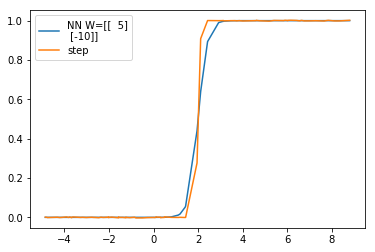

In [159]:
# plot the prediction vs true
# your code here
plt.plot(X, z1, label='NN W='+str(WL0))
plt.plot(step_df.x, step_df.y, label='step')
plt.legend();

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [160]:
### 1.1 Check that you have the requested variables
for var in ['sigmoid', 'forward_step', 'step_df' , 'one_hump_df' , 'two_hump_df']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

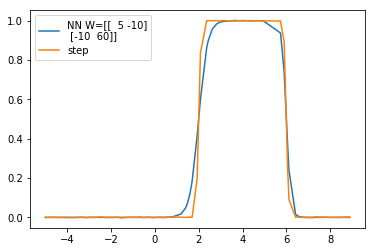

In [161]:
### cs109Test(test1.2) ###
# ONE HUMP  - two nodes in hidden layer
# your code here


# input 
X = one_hump_df['x'].values.reshape(-1,1)
Y = one_hump_df['y'].values
c1 = 2
b11 = 5
b10 = -c1*b11
c2 = 6
b21 = -10 #changed from -5 to -10
b20 = -c2*b21

WL0 =np.array([[b11,b10], [b21,b20]])
WL1 = np.array([[1], [1], [-1]]) # height of each step

# forward pass
z1, z0 = forward_step(X, WL0, WL1, y)
# plot
plt.plot(X,z1, label='NN W='+str(WL0))
plt.plot(X, Y, label='step')
plt.legend();

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

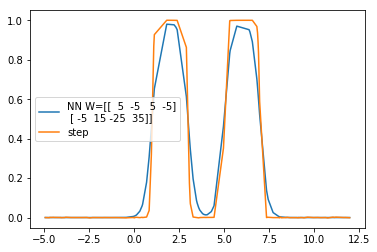

In [163]:
### cs109Test(test1.3) ###
# TWO HUMPS  - four nodes in hidden layer 
# your code here


# input 
X = two_hump_df['x'].values.reshape(-1,1)
y = two_hump_df['y'].values

c1 = 1
b11 = 5
b10 = -c1*b11

c2 = 3
b21 = -5
b20 = -c2*b21

c3 = 5
b31 = 5
b30 = -c3*b31

c4 = 7
b41 = -5
b40 = -c4*b41

WL0 = np.array([[b11,b21,b31,b41],[b10,b20,b30,b40]])
WL1 = np.array([[1], [1], [1], [1], [-2]]) # height of each step

# forward pass
z1, z0 = forward_step(X, WL0, WL1, y)
# plot
plt.plot(X,z1, label='NN W='+str(WL0))
plt.plot(X, y, label='step')
plt.legend();

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained?

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [164]:
### cs109Test (testLostFunctions) ###

# Loss function 
def L(y_pred, y):   
    """
    This function returns the appropriate loss given the predictions and actual values
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
    Output:
        loss:   A scalar for the loss"""
    # your code here 
    loss =  np.mean(np.square(y_pred - y))
    return loss
    

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [165]:
### cs109Test (test_der_L_WL1) ###

    
# derivative with respect to W1
def der_L_WL1(z, y_pred, y):
    """
    This function calculates the derivatives with respect to output weights
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
        z:      A vector with the values of the output layer 
    Output:
        ders:   A vector of partial derivatives 
    """
    # your code here 
    ders = 2*np.dot(z.T, (y_pred - y))/len(y)
    #ders = ders.reshape(1,ders.shape[0])
    # end of your code here
    return ders # returns vector of partial derivatives

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [166]:
### cs109Test (test_GradientDescent) ###

# gradient descent 
def gradient_descent(steps, lr, WL0, WL1, X, y):
    """
    This function performs Gradient Descent
    Inputs: 
        steps: Number of steps
        lr: Learning Rate
        WL0: Layer 0 weights
        WL1: Layer 1 weights - Initital value
        X: X
        y: y
     Outputs:
        z1:  A vector with the final values of y (after steps steps)
        WL1_n: The final values of WL1 (after steps steps)
        errors: list of errors
    """
    
    
    # your code here 
    # forward pass
    z1, z0 = forward_step(X, WL0, WL1, y)

    # starting gradient descent here
    WL1_n_minus_1 = WL1
    L_min = L(z1,y)
    errors = [L_min]

    l = lr # learning rate
    num_steps = steps

    for i in range(num_steps):
        gradient_eval = der_L_WL1(z0, z1, y) # evaluating gradient at WL1_(n-1),
        WL1_n = WL1_n_minus_1 - l*gradient_eval # updating approximation of WL1
        z1, z0 = forward_step(X, WL0, WL1_n, y) # evaluating function at new point
        error = L(z1, y) # finding error in approximation

        errors.append(error) # storing values of error
        WL1_n_minus_1 = WL1_n # x_n is the previous step now
    # end of your code here
    return z1, WL1_n, errors

#### a) step function NN (a hidden layer with a single node)

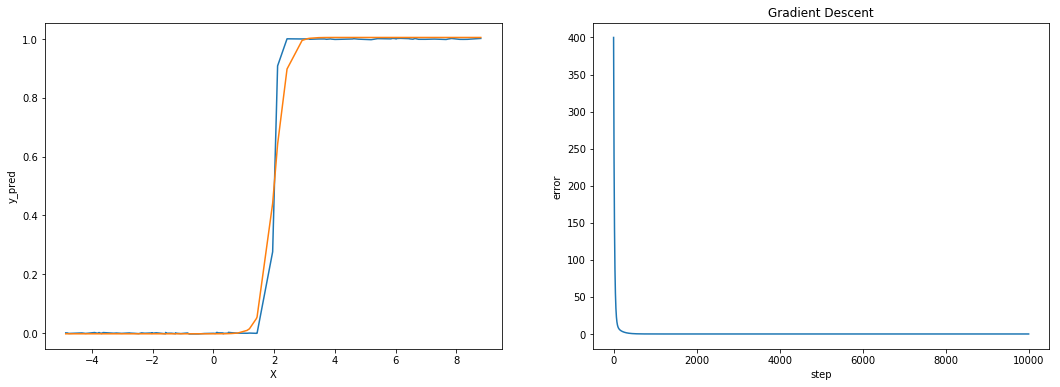

In [167]:
# SINGLE STEP
# your code here 
# values from above
X = step_df['x'].values.reshape(-1,1)
y = step_df['y'].values.reshape(-1,1)

c = 2
b1 = 5
b0 = -c*b1
WL0 = np.array([b1,b0])
#WL1 = np.array([1,0]) # starting weights
WL1 = np.array([1,20]) # starting weights

WL0 = np.array([[b1],[b0]])
WL1 = np.array([[1],[20]]) 


l = 0.01 # learning rate
num_steps = 10000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y)

figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].plot(X, y)
ax[0].plot(X, z1_new)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y_pred')
ax[1].set_title('NN with adjusted weights')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_xlabel('step')
ax[1].set_ylabel('error')
ax[1].set_title('Gradient Descent');

#### b) one hump function NN (a hidden layer with two nodes)

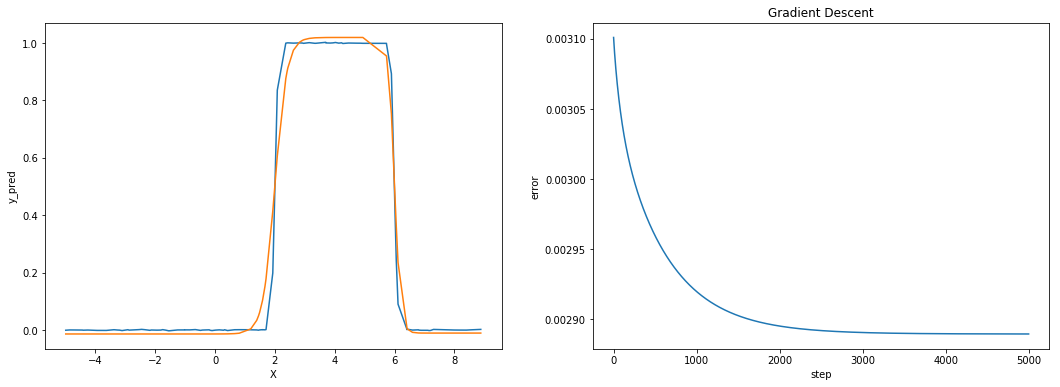

In [168]:
# ONE HUMP
# your code here 
# values from above
X = one_hump_df['x'].values.reshape(-1,1)
y = one_hump_df['y'].values.reshape(-1,1)

c1 = 2
b11 = 5
b10 = -c1*b11
c2 = 6
b21 = -10 #-5
b20 = -c2*b21

WL0 =np.array([[b11,b10], [b21,b20]])
WL1 = np.array([[1], [1], [-1]]) # height of each step


l = 0.01 # learning rate
num_steps = 5000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y)

figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].plot(X, y)
ax[0].plot(X, z1_new)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y_pred')
ax[1].set_title('NN with adjusted weights')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_xlabel('step')
ax[1].set_ylabel('error')
ax[1].set_title('Gradient Descent');

#### c) two hump function NN (a hidden layer with 4 nodes)

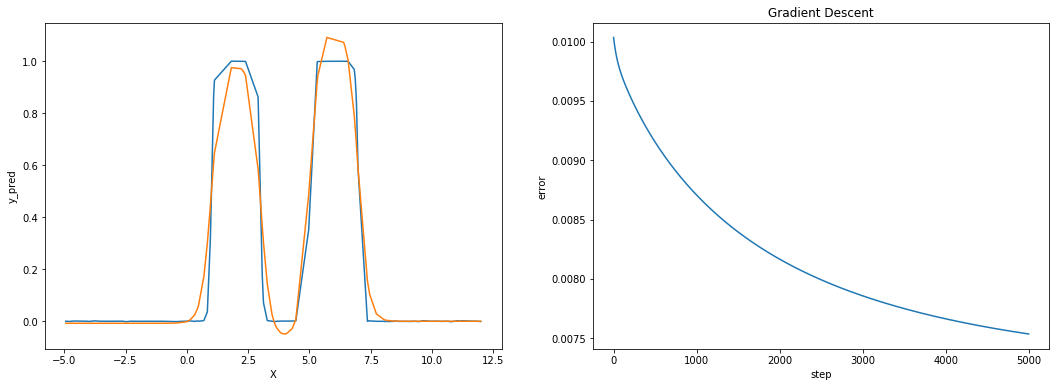

In [169]:
# TWO HUMPS
# your code here 
# values from above
X = two_hump_df['x'].values.reshape(-1,1)
y = two_hump_df['y'].values.reshape(-1,1)

c1 = 1
b11 = 5
b10 = -c1*b11

c2 = 3
b21 = -5
b20 = -c2*b21

c3 = 5
b31 = 5
b30 = -c3*b31

c4 = 7
b41 = -5
b40 = -c4*b41


WL0 = np.array([[b11,b21,b31,b41],[b10,b20,b30,b40]])
WL1 = np.array([[1], [1], [1], [1], [-2]]) # height of each step


l = 0.01 # learning rate
num_steps = 5000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y)

figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].plot(X, y)
ax[0].plot(X, z1_new)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y_pred')
ax[1].set_title('NN with adjusted weights')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_xlabel('step')
ax[1].set_ylabel('error')
ax[1].set_title('Gradient Descent');

<hr style='height:2pt'>
<div class='theme'> Neural Networks part B</div> 

Neural networks are, of course, a large and complex topic that cannot be covered in a single homework. Here, we'll focus on the key idea of ANNs: they are able to learn a mapping from example input data $X$ (of fixed size) to example output data $Y$ (of fixed size). This is the same concept as every other classification and regression task we've learned so far in the semester. We'll also partially explore what patterns the neural network learns and how well neural networks generalize.

In this question, we'll see if neural networks can learn a limited version of the [Fourier Transform.](https://en.wikipedia.org/wiki/Fourier_transform) (The Fourier Transform takes in values from some function and returns a set of sine and cosine functions which, when added together, approximate the original function.)

In symbols: $ \cal{F(s)} = \int_{-\infty}^\infty f(x)e^{- i xs}dx$. In words, the value of the transformed function at some point, $s$, is the value of an integral which measures, in some sense, how much the original $f(x)$ looks like a wave with a period of $s$. As an example, with $f(x) = 4cos(x) + sin(2x)$,  $\cal{F}(s)$ is 0 everywhere except at -2, -1, 1, and 2, mapping to the waves of period 1 and 1/2. The values at these points are linked to the magnitude of the waves, and their phases (roughly: sin waves versus cosine waves).

The only thing about the Fourier transform that matters for this p-set is this: a function goes in, and a re-written form in terms of sine and cosine comes out.

In our specific problem, we'll train a network to map from 1000 sample values from a function (equally spaced along 0 to 10$\pi$) to the four features of the sine and cosine waves that make up that function. Thus, the network is attempting to learn a mapping from a 1000-entry vector down to a 4-entry vector. Our `X_train` dataset's shape is $N x 1000$ and our `y_train` is $N x 4.$

Questions 2.1 and 2.2 will get you used to the format of the data. 

We'll use 6 data files in this question:
- `sinewaves_X_train.npy` and `sinewaves_y_train.npy`: a (10,000 x 1,000) and (10,000 x 4) training dataset. Examples were generated by randomly selecting a,b,c,d in the interval [0,1] and building the curve $a\sin(b\,x) + c\cos(d\,x)$
- `sinewaves_X_test.npy` and `sinewaves_y_test.npy`: a (2,000 x 1,000) and (2,000 x 4) test dataset, generated in the same way as the training data
- `sinewaves_X_extended_test` and `sinewaves_y_extended_test`: a (9 x 1,000) and (9 x 4) test dataset, testing whether the network can generalize beyond the training data (e.g. to negative values of $a$)

**These datasets are read in to their respective variables for you.**

<div class='exercise'> <b> Question 2 [25pts] </b> </div>
    
**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [170]:
### cs109default ### 
def plot_predictions(model, test_x, test_y, count=None):
    # Model - a tf.keras model that takes in (n,1000) training data and predicts (n,4) output data
    # test_x - a (n,1000) input dataset
    # test_y - a (n,4) output dataset
    # This function will plot the sine curves in the training data and those implied by the model's predictions.
    # It will also print the predicted and actual output values.
    
    #helper function that takes the n by 4 output and reverse-engineers 
    #the sine curves that output would create
    def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data
    
    #if <20 examples, plot all. If more, just plot 5
    if count==None:
        if test_x.shape[0]>20:
            count=5
        else:
            count=test_x.shape[0]
    
    #build predictions
    predicted = model.predict(test_x)
    implied_x = y2x(predicted)
    for i in range(count):
        plt.plot(test_x[i,:],label='true')
        plt.plot(implied_x[i,:],label='predicted')
        plt.legend()
        plt.ylim(-2.1,2.1)
        plt.xlabel("x value")
        plt.xlabel("y value")
        plt.title("Curves using the Neural Network's Approximate Fourier Transform")
        plt.show()
        print("true:", test_y[i,:])
        print("predicted:", predicted[i,:])
    
    

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [171]:
### cs109default ### 
X_train = np.load('data/sinewaves_X_train.npy')
y_train = np.load('data/sinewaves_y_train.npy')

X_test = np.load('data/sinewaves_X_test.npy')
y_test = np.load('data/sinewaves_y_test.npy')

X_extended_test = np.load('data/sinewaves_X_extended_test.npy')
y_extended_test = np.load('data/sinewaves_y_extended_test.npy')

## Answers:  

**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.


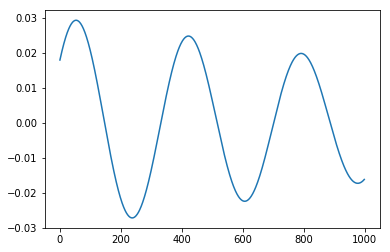

In [172]:
# your code here
plt.plot(X_train[0,:]);

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.


In [173]:
# your code here
y_train[0,:]

array([0.024, 0.533, 0.018, 0.558])

False

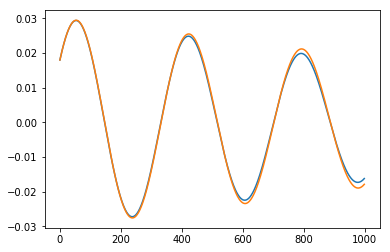

In [174]:
# your code here 
x_points = np.linspace(0,10*np.pi,1000)
train_from_test = 0.024*np.sin(0.533*x_points) + 0.018*np.cos(0.555*x_points)
plt.plot(X_train[0,:])
plt.plot(train_from_test)
np.all(X_train[0,:]==train_from_test)

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer.

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.


In [175]:
# build the fully-connected neural network
# your code here
relu=tf.keras.activations.relu

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape=(X_train.shape[1],), activation=relu),
    tf.keras.layers.Dense(100, activation=relu),
    tf.keras.layers.Dense(50, activation=relu),
    tf.keras.layers.Dense(4, activation=relu)
])

In [176]:
# Compile your model 
# your code here
adam_opt = tf.keras.optimizers.Adam()
model.compile(loss='mean_absolute_error', 
              optimizer=adam_opt)
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 200)               200200    
_________________________________________________________________
dense_58 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_59 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_60 (Dense)             (None, 4)                 204       
Total params: 225,554
Trainable params: 225,554
Non-trainable params: 0
_________________________________________________________________


*your answer here*



In [177]:
# Fit your model 
# your code here
model.fit(X_train, y_train, 
          epochs=50, 
          batch_size=32, 
          validation_split=.2,
          verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 3s 394us/sample - loss: 0.1410 - val_loss: 0.1023
Epoch 2/50
8000/8000 [==============================] - 2s 274us/sample - loss: 0.0902 - val_loss: 0.0815
Epoch 3/50
8000/8000 [==============================] - 2s 286us/sample - loss: 0.0762 - val_loss: 0.0695
Epoch 4/50
8000/8000 [==============================] - 2s 275us/sample - loss: 0.0674 - val_loss: 0.0658
Epoch 5/50
8000/8000 [==============================] - 3s 404us/sample - loss: 0.0615 - val_loss: 0.0653
Epoch 6/50
8000/8000 [==============================] - 3s 373us/sample - loss: 0.0562 - val_loss: 0.0522
Epoch 7/50
8000/8000 [==============================] - 3s 328us/sample - loss: 0.0524 - val_loss: 0.0484
Epoch 8/50
8000/8000 [==============================] - 2s 300us/sample - loss: 0.0490 - val_loss: 0.0485
Epoch 9/50
8000/8000 [==============================] - 2s 306us/sample - loss: 0.0460 - val_loss: 0.050

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?


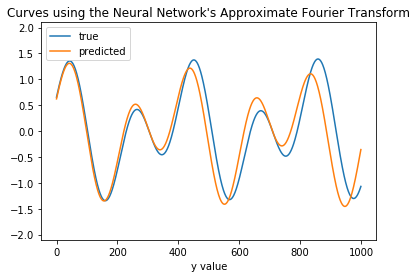

true: [0.86199664 0.98175913 0.65523998 0.4870337 ]
predicted: [0.8527044 1.0055515 0.6222889 0.5198485]


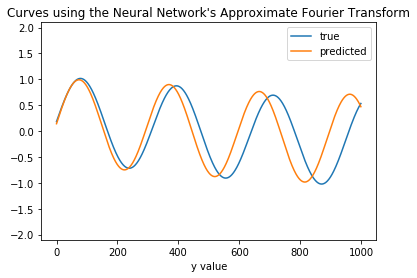

true: [0.8406355  0.63159555 0.18328701 0.11174618]
predicted: [0.85325587 0.6746671  0.14211908 0.10727362]


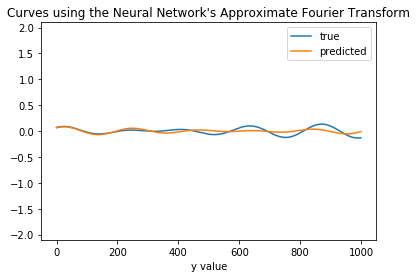

true: [0.06591224 0.75183886 0.06986143 0.91352303]
predicted: [0.05685056 0.83197385 0.06500898 0.91480553]


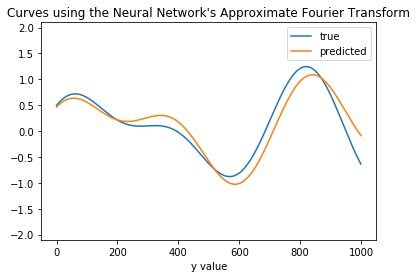

true: [0.75610725 0.30861152 0.49522059 0.48394499]
predicted: [0.6941137  0.28335503 0.46441776 0.48790258]


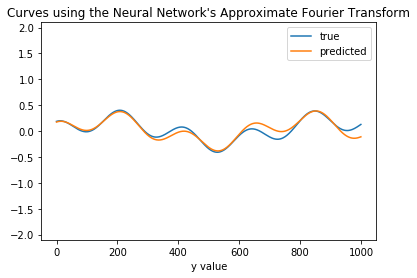

true: [0.2229353  0.27885697 0.18696198 0.94846283]
predicted: [0.22439705 0.3038694  0.1744062  0.9341363 ]


In [178]:
# your code here
plot_predictions(model,X_test,y_test)

In [179]:
# model's overall loss
# your code here
model.evaluate(X_test,y_test,verbose=0)

0.026855165630578996

*your answer here*




The model is, in most cases, doing a very good job pinning down the correct coefficients. It seems to be making numerical errors on the order of +/- .02, and this error decreases with further training. The model has a total loss of 0.3, in line with the training and validation error. It looks like the model has learned the mapping from data to the coefficients that generated the data.

----

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?


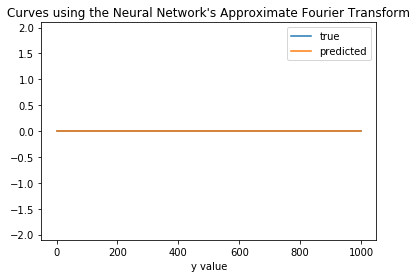

true: [0. 0. 0. 0.]
predicted: [-0.         0.5603675 -0.         0.6100991]


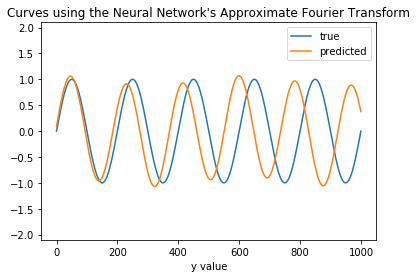

true: [1. 1. 0. 0.]
predicted: [0.9764296  1.0847204  0.09525273 0.3219616 ]


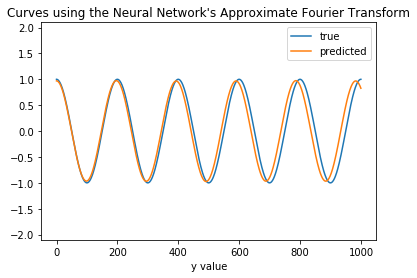

true: [0. 0. 1. 1.]
predicted: [0.00427948 0.31799686 0.96976334 1.0173285 ]


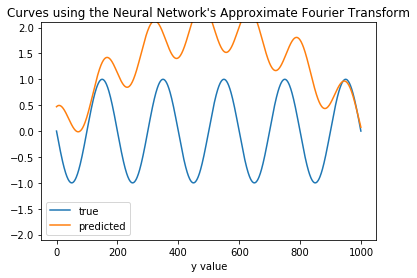

true: [-1.  1.  0.  0.]
predicted: [2.0053563  0.0969066  0.47014228 1.2582387 ]


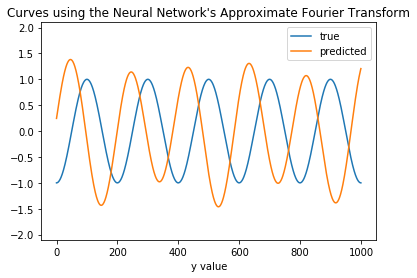

true: [ 0.  0. -1.  1.]
predicted: [1.2203252  1.0327216  0.24499446 0.57294834]


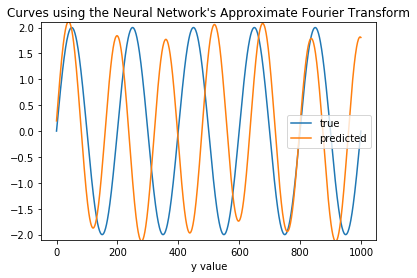

true: [2. 1. 0. 0.]
predicted: [1.9357612  1.2539207  0.1969589  0.33049935]


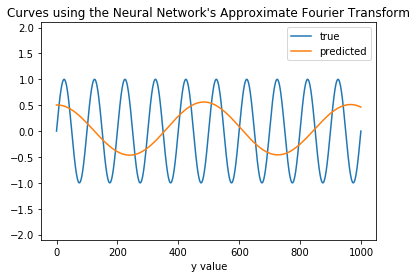

true: [1. 2. 0. 0.]
predicted: [0.05755961 0.09850621 0.5041361  0.41324782]


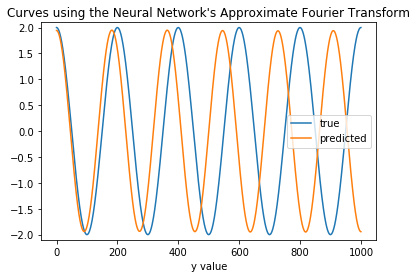

true: [0. 0. 2. 1.]
predicted: [0.0066149  0.20097153 1.9434398  1.0995343 ]


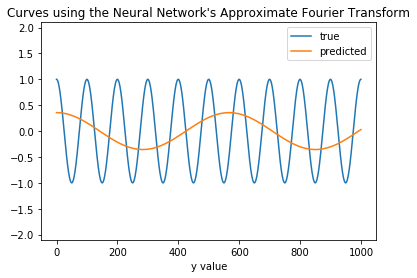

true: [0. 0. 1. 2.]
predicted: [ 0.82648253 -0.          0.35644355  0.3526447 ]


In [180]:
# your code here
plot_predictions(model,X_extended_test,y_extended_test)

*Your answer here*



The model does well on examples with coefficients in the range $[0,1]$ but struggles when coefficients are negative or bigger than 1.

----

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

*Your answer here*


The model is struggling to accurately predict answers on data outside the examples given in training. Even so, it is easily able to provide correct answers for new data _from the same distribution as the training data_. The network is not overfit nor underfit- it performs equally well on its training data as on held-out test data.

However, although the model learned _a_ rule for mapping from its training input to the example outputs, it did not learn the rule we had in mind, and the model does not extend beyond the kinds of examples it was trained on.  This is a form of extrapolation.

**Instructor's note**: This is a common theme with neural networks and other black-box learners: they will figure out a rule that works on the data they are trained on, but that rule is unlikely to extend beyond the range of the training examples. Collecting good data is the most important analytic step!
----

<hr style='height:2pt'>

<div class='theme'> Regularizing Neural Networks </div>

In this problem set, we have already explored how ANNs are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size), and how well the neural network can generalize. In this problem, we focus on issues of overfitting and regularization in neural networks.

As we have explained in class, ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.

There are several methods used to improve ANN generalization. One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.

However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella of regularization.

In this problem, you are asked to regularize a network given to you below.
    
For this problem, we will be working with a modified version of MNIST dataset (MNIST CS109, MNIST: Modified National Institute of Standards and Technology database), which is a large database of handwritten digits and commonly used for training various image processing systems. This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. For pedagogical simplicity, we will only use the digits labeled `4` and `9`, and we want to use a total of 1600 samples for training (this includes the data you will use for validation).

We have selected the samples for you and the dataset is available at https://www.kaggle.com/c/cs109a. You have to create an account on Kaggle and join the competition via https://www.kaggle.com/t/ca16b77c5feb4cbabb0d8cf63d9a7212. This is a limited participation competition. Please do not share link. Note, it's not technically a competition, as your goal is merely to create an appropriate, strong model that performs well. We will evaluate your skills based on this, not in terms of how you compare to your classmates.

`x_train_mnist_cs109.csv` is our training dataset, last column is the target column. Class 0 means sample is handwritten digit 4 and class 1 means sample is handwritten digit 9.  784 columns correspond to 28x28 image size. 


`x_test_mnist_cs109.csv` has  structure similar to `x_train_mnist_cs109.csv` with no labels. `x_test_mnist_cs109.csv` has 3200  samples. Kaggle leaderboard scores are accuracy scores calculated on this test set.  

`sample_submission.csv` is the format that kaggle will accept.



<div class='exercise'> <b> Question 3 [25 pts] </b> </div>
    
**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`: 

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU 
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid 
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 


**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation. 


- 3.3.1 Display model summary, training and validation accuracy and loss. 
- 3.3.2 Print the difference between training and validation accuracy and loss.
- 3.3.3 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.4 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.5 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Fill the cell below that starts with ### cs109test (Kaggle_name) ###.** 




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model. 

- **No CNNs allowed for this competition.**

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- **Do not create multiple accounts on Kaggle.**


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit. 

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students




## Answers

**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.


(1600, 785)
(3200, 784)
(1600, 784) (1600,) (3200, 784)


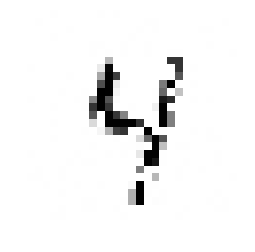

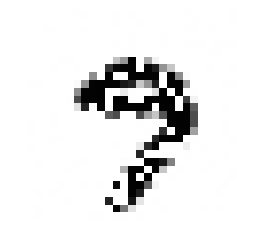

In [181]:
# your code here
x_train_df = pd.read_csv('data/kaggleonly1/x_train_mnist_cs109.csv')
print(x_train_df.shape)

x_test_df = pd.read_csv('data/kaggleonly1/x_test_mnist_cs109.csv')
print(x_test_df.shape)

y_train = np.array(x_train_df.iloc[:,784])
x_train = np.array(x_train_df.iloc[:,:-1])

x_test = np.array(x_test_df)

print(x_train.shape,y_train.shape, x_test.shape)

# scale the data otherwise reLU can become unstable 

x_train = (x_train-x_train.mean(axis=1).reshape(-1,1))/(x_train.std(axis=1).reshape(-1,1))
x_test =  (x_test - x_test.mean(axis=1).reshape(-1,1))/( x_test.std(axis=1).reshape(-1,1))


plt.axis('off')
plt.imshow(x_train.reshape(-1, 28,28)[2], cmap='Greys')
plt.show()
plt.axis('off')
plt.imshow(x_train.reshape(-1, 28,28)[1], cmap='Greys');

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`:

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting.



Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_62 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_63 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
Training:  0.17756266630015488 0.971875
Val Acc: 0.90625
Diff: 0.06562501


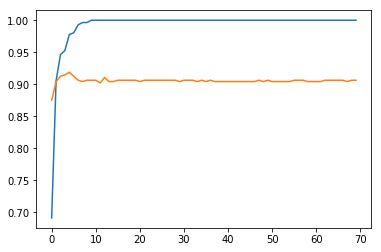

In [182]:
# your code here

batch_size = 128
epochs = 70
num_classes = 2 
nodes_layers = [100,100,100]  #[100,100, 100]  #[80,80,80] #[100,100, 100] 

#reset the model 
model_overfit = tf.keras.models.Sequential()
# first hidden layer 
model_overfit.add(tf.keras.layers.Dense(nodes_layers[0], activation='relu', input_shape=(784,)))
# hidden layers 
for s in nodes_layers[1:]:
    model_overfit.add(tf.keras.layers.Dense(units = s,  activation = 'relu'))
# output layer 
model_overfit.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

# Summary 
model_overfit.summary()

# compile it 

model_overfit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# fit it 
history_basic = model_overfit.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  validation_split=.3, verbose=False)#False


model_overfit_loss, model_overfit_acc = model_overfit.evaluate(x_train, y_train, verbose=False)
print("Training: ",model_overfit_loss,model_overfit_acc)

model_overfit_valacc = history_basic.history['val_acc'][-1]
print("Val Acc:",model_overfit_valacc)
print("Diff:", model_overfit_acc-model_overfit_valacc)


plt.plot(history_basic.history['acc'])
plt.plot(history_basic.history['val_acc']);

#Public Score: 0.9422222222222222
#Private Score: 0.947076923076923

*your answer here*


The complexity of the network introduces more complex functions that can pick up the specificity of the image data presented to the network for training. We can see that as the training curve, shows  1 for learning, as the ANN is incorporating and fitting higher resolution features from the images that are not necessarily needed when for example we are trying to distinguish between any digits-recognition, in this case the digits 4 and 9.
Here we can see the situation of overfitting where, in this case the ANN has been able to learn in specificity the patterns present in the training data, however it is unable to learn as to how to generalize that same learning to new data, seen in the validation curve and test score.


**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation.


- 3.3.1 Display model summary, training and validation accuracy and loss.
- 3.3.2 Print the difference between training and validation accuracy and loss.
- 3.3.3 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.4 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.5 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Fill the cell below that starts with ### cs109test (Kaggle_name) ###.**




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model.

- **No CNNs allowed for this competition.**

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- **Do not create multiple accounts on Kaggle.**


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit.

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students



### cs109test (Kaggle_name) ###

**Your Kaggle Leaderboard name(No credit without the name!) = ____ **

In [186]:
# your code here



batch_size = 128
epochs = 1700
num_classes = 2 
nodes_layers = [100,100,100]  #[100,100, 100]  #[80,80,80] #[100,100, 100] 
kernel_weight = 0.003
bias_weight = 0.003
activity_weight = 0.0

#reset the model 
model = tf.keras.models.Sequential()
# firzt hidden layer
model.add(tf.keras.layers.Dense(nodes_layers[0], activation='relu', input_shape=(784,)))
# hidden layers 
for s in nodes_layers[1:]:
    model.add(tf.keras.layers.Dense(units = s,  activation = 'relu', 
                                    kernel_regularizer=tf.keras.regularizers.l2(kernel_weight), 
                                    bias_regularizer=tf.keras.regularizers.l2(bias_weight) ))
    model.add(tf.keras.layers.Dropout(0.1))

# output layer 
model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

# Summary 
print(model.summary())


# compile it 


optimize = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['acc'])


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_70 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________

Training: 0.44137590209487826 0.980625
Val Acc: 0.93541664
Diff: 0.045208335


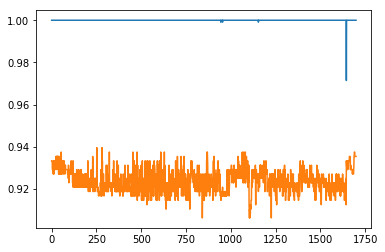

In [188]:
# your code here
# fit it 
history_basic = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  validation_split=.3, verbose=False)

loss, acc = model.evaluate(x_train, y_train, verbose=False)
print("Training:",loss,acc)

valacc = history_basic.history['val_acc'][-1]
print("Val Acc:",valacc)
print("Diff:", acc-valacc)



plt.plot(history_basic.history['acc'])
plt.plot(history_basic.history['val_acc']);

#Public Score: 0.9523809523809523
#Private Score: 0.9538461538461539

In [190]:
# your code here
preds = model.predict_classes(x_test).flatten()
sample_submission = pd.read_csv('data/kaggleonly1/sample_submission.csv')
kagglesubmission = pd.DataFrame([np.arange(0,3200),preds]).T
kagglesubmission.columns = ['id', 'category']
kagglesubmission.to_csv('kagglesubmission.csv', index=False)


In [191]:
### cs109default ### 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


---

<div class='exercise'><b> Question 4: Model interpretations </b> </div>

In this problem you will be building and interpreting models to predict whether or not a flight was delayed for its arrival based on features that could be measured as the flight takes off.  The included variables are:

**ARRIVAL_DELAY**: the difference between scheduled arrival and actual arrival, in minutes (positive is late, negative is early).

**DISTANCE**: the distance between arrival and departure airports, in miles.

**SCHEDULED_TIME**: the amount of time the flight was scheduled to take.

**MONTH**: the month the flight took off, 1 = January, 2 = February, etc.

**SCHED_DEP_HOUR**: the scheduled departure time (the hour of the day).

**SCHED_ARR_HOUR**: the scheduled arrival time (the hour of the day).

**FLIGHT_COUNT**: the number of flights flying out of that airport before noon on a typical day.

**DAY_OF_WEEK**: the day of the week, 1 = Monday, 2 = Tuesday, etc.

**ORIGIN_AIRPORT**: the airport the flight took off from.

**DESTINATION_AIRPORT**: the airport the flight was scheduled to land at.

For the airport codes, see: https://www.bts.gov/topics/airlines-and-airports/world-airport-codes

This problem steps you through fitting several models (starting simple, tuning a  and building up to complex), evaluate their accuracies, and then interpret the relationships of the predictors in the models via feature importance measures and through plotting their predications.

*Note: the observations were stratified sampled so that roughly half of the observations were delayed and half of the observations were not delayed.


**4.1**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). Turn the following predictors into dummies: `['ORIGIN_AIRPORT','DESTINATION_AIRPORT']`, and then split into train and test (80-20 split) using `train_test_split` with a random state of `109`.  Print out the dimensions of the resulting train and test `flights_train` and `flights_test` data frames.

**4.2** Fit two tree based models: one with `max_depth = 20` (call it `tree20`) and one with a `best_depth` that is chosen via 5-fold cross-validation (call it `tree_best`) using all predictors.  Evaluate these two models via AUC on both train and test.  Print out `tree20_train_auc`, `tree20_test_auc`, `tree_best_train_auc`, and `tree_best_test_auc` (make sure they are well-labeled in the print out; see primer below).

**4.3** Interpret your tree based models.  Provide a plot with the **relative** variable importance of the 10 most important predictors, `top_predictors` in each of the two models.  Interpret (i) which variables are clearly most important and (ii) compare to each other to describe how the two models differ and/or agree with which variables matter. 

**4.4** Fit an artifical neural network model (call it `NN_model`) using all predictors.  Use a dense 2-layer feed-forward network (1 input, 1 hidden) with 15 nodes in each layer.  Evaluate the model on both train and test, and print out the resulting `NN_model_train_auc`, `NN_model_train_auc`.

**4.5** Fit a classification tree with `max_depth=20` on the predictions from your `NN_model`.  Call it `dec_tree_NN`.  Draw the first 3 layers of the tree and interpret what predictors seem most important in `dec_tree_NN` from the top of this tree.

**4.6** Use your `dec_tree_NN` to measure **relative** variable importance in your `NN_model` and provide a plot for the 10 most important predictors.  How do these compare to those from 4.3 and the drawn tree in 4.5?  Discuss in 2-4 sentences.

**4.7** Interpret the results of your `NN_model` via plotting predicted probabilities of delay vs. `SCHED_DEP_HOUR` when all the other variables are set to their means/modes.  Interpret what you see in 2-4 sentences.

## Answers

**4.1**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). Turn the following predictors into dummies: `['ORIGIN_AIRPORT','DESTINATION_AIRPORT']`, and then split into train and test (80-20 split) using `train_test_split` with a random state of `109`.  Print out the dimensions of the resulting train and test `flights_train` and `flights_test` data frames.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [44]:
### cs109test (test_4.1) ### 
# your code here 
flights_df = pd.read_csv('data/flights.csv')
flights_df.head()

flights_df['DELAY_OR_NOT'] = 1*(flights_df['ARRIVAL_DELAY']>=15)
temp = flights_df[['DELAY_OR_NOT','DISTANCE','SCHEDULED_TIME','SCHED_DEP_HOUR','SCHED_ARR_HOUR','FLIGHT_COUNT','MONTH','DAY_OF_WEEK']]


dummy_vars = pd.get_dummies(flights_df[['ORIGIN_AIRPORT','DESTINATION_AIRPORT']])
flights_df = temp.join(dummy_vars)


flights_df.head()



flights_train, flights_test= train_test_split(flights_df,test_size=0.20, random_state=109)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(10000, 1000) (1600,) (2000, 1000) (2000, 4)


</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [45]:
### 4.1 Check that you have the requested variables
for var in ['flights_train', 'flights_test']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**4.2** Fit two tree based models: one with `max_depth = 20` (call it `tree20`) and one with a `best_depth` that is chosen via 5-fold cross-validation (call it `tree_best`) using all predictors.  Evaluate these two models via AUC on both train and test.  Print out `tree20_train_auc`, `tree20_test_auc`, `tree_best_train_auc`, and `tree_best_test_auc` (make sure they are well-labeled in the print out; see primer below).


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [192]:
### cs109test (test_4.2a) ### 
# your code here
y_train = flights_train['DELAY_OR_NOT']
y_test = flights_test['DELAY_OR_NOT']

X_train = flights_train.drop(['DELAY_OR_NOT'],axis=1)
X_test = flights_test.drop(['DELAY_OR_NOT'],axis=1)



tree20 = DecisionTreeClassifier(max_depth=20).fit(X_train,y_train)

# end of your code here

In [193]:
### cs109test (test_4.2b) ### 
# Decision Tree Classifier
# your code here 
dec_tree = DecisionTreeClassifier()
depths = {'max_depth': list(range(2,15))}
dec_tree_grid = GridSearchCV(dec_tree, depths, cv=5, scoring='roc_auc')
dec_tree_grid.fit(X_train,y_train)
best_depth = max([(s,d) for s,d in zip(dec_tree_grid.cv_results_['mean_test_score'],list(range(2,15)))],key=lambda x: x[0])[1]
tree_best = DecisionTreeClassifier(max_depth=best_depth).fit(X_train, y_train)
best_depth


# end of your code here
### 4.2 Check that you have the requested variables
for var in ['tree20', 'tree_best', 'best_depth']:
    assert var in globals(), f"Variable '{var}' does not exist!"

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [47]:
### cs109test (test_4.2c) ### 
# primer to print: 
# print("tree20_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 
#score the two models on the train and test set
#print(sk.metrics.roc_auc_score(y_train, logitCV.predict_proba(X_train)[:,1]))
print("tree20_train_auc:", roc_auc_score(y_train, tree20.predict_proba(X_train)[:,1]))
print("tree20_test_auc:",  roc_auc_score(y_test, tree20.predict_proba(X_test)[:,1]))
print("best_tree_train_auc:", roc_auc_score(y_train, tree_best.predict_proba(X_train)[:,1]))
print("best_tree_test_auc:", roc_auc_score(y_test, tree_best.predict_proba(X_test)[:,1]))


tree20_train_auc: 0.9653231709573903
tree20_test_auc: 0.6583189248703238
best_tree_train_auc: 0.7816462533860971
best_tree_test_auc: 0.7685739171652545


In [ ]:
# your code here  
print(accuracy_score(y_train, tree20.predict(X_train)))
print(accuracy_score(y_test, tree20.predict(X_test)))
print(accuracy_score(y_train, tree_best.predict(X_train)))
print(accuracy_score(y_test, tree_best.predict(X_test)))

**4.3** Interpret your tree based models.  Provide a plot with the **relative** variable importance of the 10 most important predictors, `top_predictors` in each of the two models.  Interpret (i) which variables are clearly most important and (ii) compare to each other to describe how the two models differ and/or agree with which variables matter.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

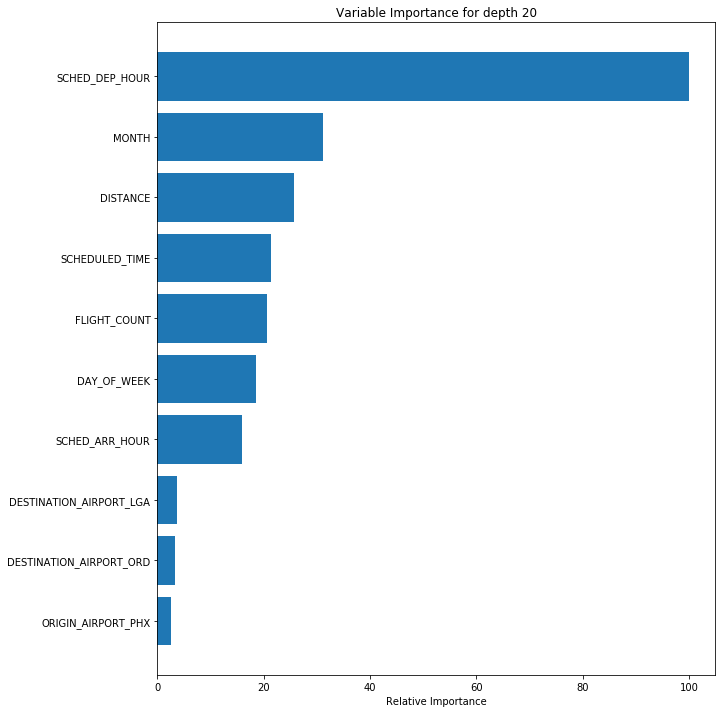

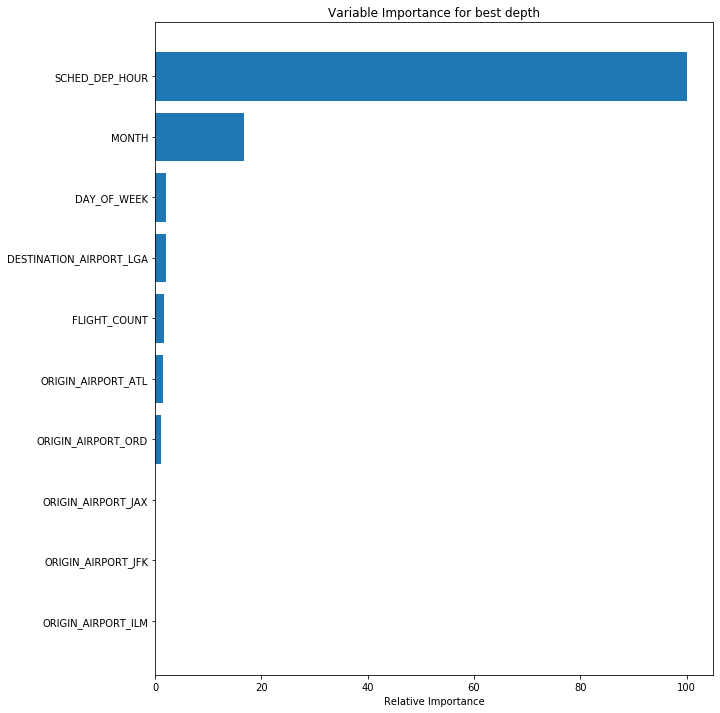

In [49]:
### cs109test (test_4.3) ### 
#feature importance
# your code here 
feature_importance = tree20.feature_importances_

relative_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(relative_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(10,12))
plt.barh(pos, relative_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance for depth 20')

feature_importance = tree_best.feature_importances_

relative_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(relative_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(10,12))
plt.barh(pos, relative_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance for best depth');

*your answer here* 

**4.4** Fit an artifical neural network model (call it `NN_model`) using all predictors.  Use a dense 2-layer feed-forward network (1 input, 1 hidden) with 15 nodes in each layer.  Evaluate the model on both train and test, and print out the resulting `NN_model_train_auc`, `NN_model_train_auc`.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [50]:
### cs109test (test_4.4) ### 
# build the NN 
# your code here
NN_model = []
nodes_layers =[15,15] 

#reset the model 
NN_model = tf.keras.models.Sequential()

# first hidden layer
NN_model.add(tf.keras.layers.Dense(nodes_layers[0], activation='tanh', input_shape=(X_train.shape[1],)))

# hidden layers 
for s in nodes_layers[1:]:
    print(s)
    NN_model.add(tf.keras.layers.Dense(units = s,  activation = 'tanh'))

# output layer 
NN_model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))


# Summary 
NN_model.summary()

15
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 15)                12165     
_________________________________________________________________
dense_25 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 16        
Total params: 12,421
Trainable params: 12,421
Non-trainable params: 0
_________________________________________________________________


</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [ ]:
### 4.4 Check that you have the requested variables
for var in ['NN_model']:
    assert var in globals(), f"Variable '{var}' does not exist!"

In [51]:
# compile it and run it
# your code here 
X_test_std = ((X_test-X_train.mean(axis=0))/(X_train.std(axis=0)+0.2))
X_train_std = ((X_train-X_train.mean(axis=0))/(X_train.std(axis=0)+0.2))

batch_size = 32
epochs = 30



opt = tf.keras.optimizers.SGD(lr=0.002,clipvalue=0.7)


NN_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

# fit it 

history_basic = NN_model.fit(X_train_std, y_train, batch_size=batch_size, epochs=epochs,  validation_split=.3, verbose=True)#False


Train on 5600 samples, validate on 2400 samples
Epoch 1/30
5600/5600 [==============================] - 0s 69us/sample - loss: 0.6627 - acc: 0.6036 - val_loss: 0.6192 - val_acc: 0.6862
Epoch 2/30
5600/5600 [==============================] - 0s 50us/sample - loss: 0.5995 - acc: 0.6980 - val_loss: 0.5846 - val_acc: 0.7079
Epoch 3/30
5600/5600 [==============================] - 0s 51us/sample - loss: 0.5780 - acc: 0.7055 - val_loss: 0.5724 - val_acc: 0.7117
Epoch 4/30
5600/5600 [==============================] - 0s 51us/sample - loss: 0.5674 - acc: 0.7152 - val_loss: 0.5663 - val_acc: 0.7167
Epoch 5/30
5600/5600 [==============================] - 0s 51us/sample - loss: 0.5602 - acc: 0.7186 - val_loss: 0.5627 - val_acc: 0.7242
Epoch 6/30
5600/5600 [==============================] - 0s 50us/sample - loss: 0.5545 - acc: 0.7248 - val_loss: 0.5602 - val_acc: 0.7233
Epoch 7/30
5600/5600 [==============================] - 0s 51us/sample - loss: 0.5497 - acc: 0.7277 - val_loss: 0.5585 - val_acc: 

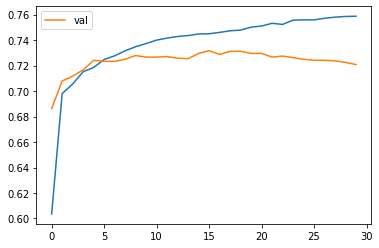

In [52]:
# plot train and val acc as  a function of epochs
# your code here
plt.plot(history_basic.history['acc'])
plt.plot(history_basic.history['val_acc'], label='val')
plt.legend()


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [53]:
### cs109test (test_4.4b) ### 
# primer to print: 
# print("NN_model_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 
print("NN_model_train_auc:",roc_auc_score(y_train, NN_model.predict_proba(X_train_std.values)))
print("NN_model_test_auc:",roc_auc_score(y_test, NN_model.predict_proba(X_test_std.values)))

print(accuracy_score(y_train, NN_model.predict_classes(X_train_std.values)))
print(accuracy_score(y_test, NN_model.predict_classes(X_test_std.values)))

NN_model Train auc: 0.816570006182003
NN_model Test auc: 0.7821700395303559
0.7495
0.7415


**4.5** Fit a classification tree with `max_depth=20` on the predictions from your `NN_model`.  Call it `dec_tree_NN`.  Draw the first 3 layers of the tree and interpret what predictors seem most important in `dec_tree_NN` from the top of this tree.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [54]:
### cs109test (test_4.5) ### 
# your code here
y_train2 = NN_model.predict_classes(X_train_std.values)
dec_tree_NN = DecisionTreeClassifier(max_depth=20)
dec_tree_NN.fit(X_train,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [55]:
### 4.5 Check that you have the requested variables
for var in ['dec_tree_NN']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**4.6** Use your `dec_tree_NN` to measure **relative** variable importance in your `NN_model` and provide a plot for the 10 most important predictors.  How do these compare to those from 4.3 and the drawn tree in 4.5?  Discuss in 2-4 sentences.


In [189]:
# your code here 
feature_importance = dec_tree_NN.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(10,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

NameError: name 'dec_tree_NN' is not defined

# your code here
fig, ax = plt.subplots(1, 1, figsize=(22, 12), dpi=600)
tree.plot_tree( dec_tree_NN,max_depth = 3, filled=True,rounded=True, feature_names=X_train.columns);



**4.7** Interpret the results of your `NN_model` via plotting predicted probabilities of delay vs. `SCHED_DEP_HOUR` when all the other variables are set to their means/modes.  Interpret what you see in 2-4 sentences.

In [1]:
# your code here
yhat_NN_model_dummyX = NN_model.predict_proba(dummyX);
plt.scatter(X_train['SCHED_DEP_HOUR'],y_train)
plt.plot(dummyx,yhat_NN_model_dummyX);


*your answer here*